In [77]:
import numpy as np
# # ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
# import cartopy.crs as ccrs
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.feature_selection import f_regression

from env import user,host,password

In [12]:
# def get_connection(db,user,host,password):
#     from sqlalchemy import create_engine
#     url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
#     return create_engine(url)

In [13]:
# conn = get_connection('zillow',user,host,password)

In [14]:
# df_sql = pd.read_sql('''SELECT * FROM propertylandusetype;''', conn)

In [15]:
# df_sql

In [16]:
path = './'
df_prop16 = pd.read_csv(path + "properties_2016.csv")

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df_prop16.count()

parcelid                        2985217
airconditioningtypeid            811519
architecturalstyletypeid           6061
basementsqft                       1628
bathroomcnt                     2973755
bedroomcnt                      2973767
buildingclasstypeid               12629
buildingqualitytypeid           1938488
calculatedbathnbr               2856305
decktypeid                        17096
finishedfloor1squarefeet         202717
calculatedfinishedsquarefeet    2929652
finishedsquarefeet12            2709184
finishedsquarefeet13               7672
finishedsquarefeet15             190798
finishedsquarefeet50             202717
finishedsquarefeet6               22001
fips                            2973780
fireplacecnt                     312637
fullbathcnt                     2856305
garagecarcnt                     883267
garagetotalsqft                  883267
hashottuborspa                    69014
heatingorsystemtypeid           1806401
latitude                        2973780


In [18]:
path = './'
df_pred16 = pd.read_csv(path + "train_2016_v2.csv")

In [19]:
# df_pred16.head()

In [20]:
df_p = pd.DataFrame(df_prop16, columns=[
    'parcelid',
    'bathroomcnt',
    'bedroomcnt',
    'calculatedfinishedsquarefeet',
    'yearbuilt',
    'taxvaluedollarcnt',
    'taxamount',
    'lotsizesquarefeet'
    ])

In [21]:
df_d = pd.DataFrame(df_pred16)

In [22]:
df_d = df_d.drop('transactiondate', axis=1)

In [23]:
z2016 = pd.merge(df_p,df_d, on='parcelid')

In [24]:
# var1 = var1.drop(var1[(var1['column']>= count) &(var1['column']<=count)].index)

In [25]:
#nan_z2016.sort_values(by=['logerror'], ascending=False)

In [26]:
nan_z2016 = z2016.dropna()

In [27]:
t1_nan_z2016 = nan_z2016.drop(nan_z2016[
    (nan_z2016['calculatedfinishedsquarefeet']<= 400)
].index)

t2_nan_z2016 = t1_nan_z2016.drop(t1_nan_z2016[
    (t1_nan_z2016['bedroomcnt']<= 0)
].index)

t3_nan_z2016 = t2_nan_z2016.drop(t2_nan_z2016[
    (t2_nan_z2016['bathroomcnt']<= 0)
].index)

t4_nan_z2016 = t3_nan_z2016.drop(t3_nan_z2016[
    (t3_nan_z2016['lotsizesquarefeet']<=
     t3_nan_z2016['calculatedfinishedsquarefeet'])].index)

In [28]:
# pd.value_counts('bathroomcnt')

In [29]:
# test_nan_z2016 = nan_z2016[nan_z2016['calculatedfinishedsquarefeet']
#                            .between(6000, 23000, inclusive=True)]

In [30]:
# nan_z2016.bathroomcnt.value_counts()

In [31]:
parsed_data = t4_nan_z2016.sort_values(by=['lotsizesquarefeet',
    'bedroomcnt',
    'bathroomcnt',
    'calculatedfinishedsquarefeet'], ascending=True)

In [32]:
parsed_data.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,lotsizesquarefeet,logerror
39051,14057453,1.0,1.0,550.0,1964.0,125321.0,1713.56,770.0,0.0325
41708,14055285,1.0,1.0,600.0,1963.0,234520.0,2905.46,800.0,0.3221
56571,14055227,1.0,1.0,600.0,1963.0,156764.0,2056.76,800.0,-0.0398
71502,14055046,1.0,1.0,600.0,1963.0,267000.0,3216.20,800.0,0.0334
81978,14055116,1.0,1.0,600.0,1963.0,241082.0,2937.56,800.0,0.0363


In [33]:
parsed_data['abs_logerror'] = parsed_data['logerror'].abs()

In [34]:
parsed_data.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,lotsizesquarefeet,logerror,abs_logerror
39051,14057453,1.0,1.0,550.0,1964.0,125321.0,1713.56,770.0,0.0325,0.0325
41708,14055285,1.0,1.0,600.0,1963.0,234520.0,2905.46,800.0,0.3221,0.3221
56571,14055227,1.0,1.0,600.0,1963.0,156764.0,2056.76,800.0,-0.0398,0.0398
71502,14055046,1.0,1.0,600.0,1963.0,267000.0,3216.20,800.0,0.0334,0.0334
81978,14055116,1.0,1.0,600.0,1963.0,241082.0,2937.56,800.0,0.0363,0.0363


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


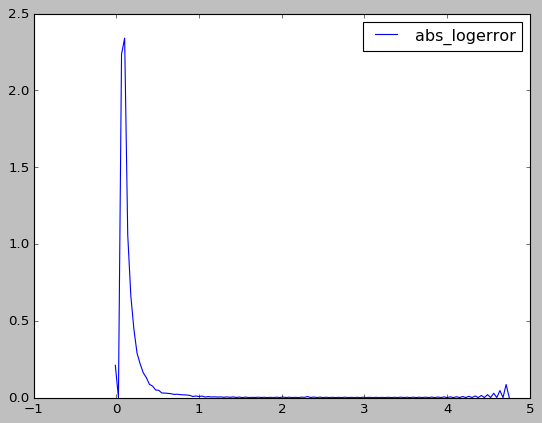

In [35]:
sns.kdeplot(data=parsed_data.abs_logerror)
plt.show()

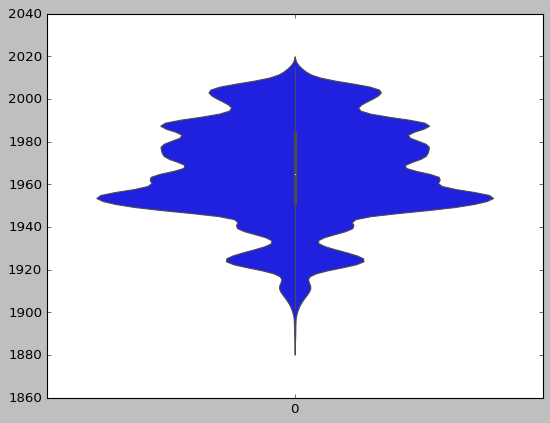

In [36]:
sns.violinplot(data=parsed_data.yearbuilt)
plt.show()

# Train Test Split

In [46]:
X = parsed_data.drop(['parcelid','abs_logerror'], axis=1)
y = parsed_data[['abs_logerror']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [47]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


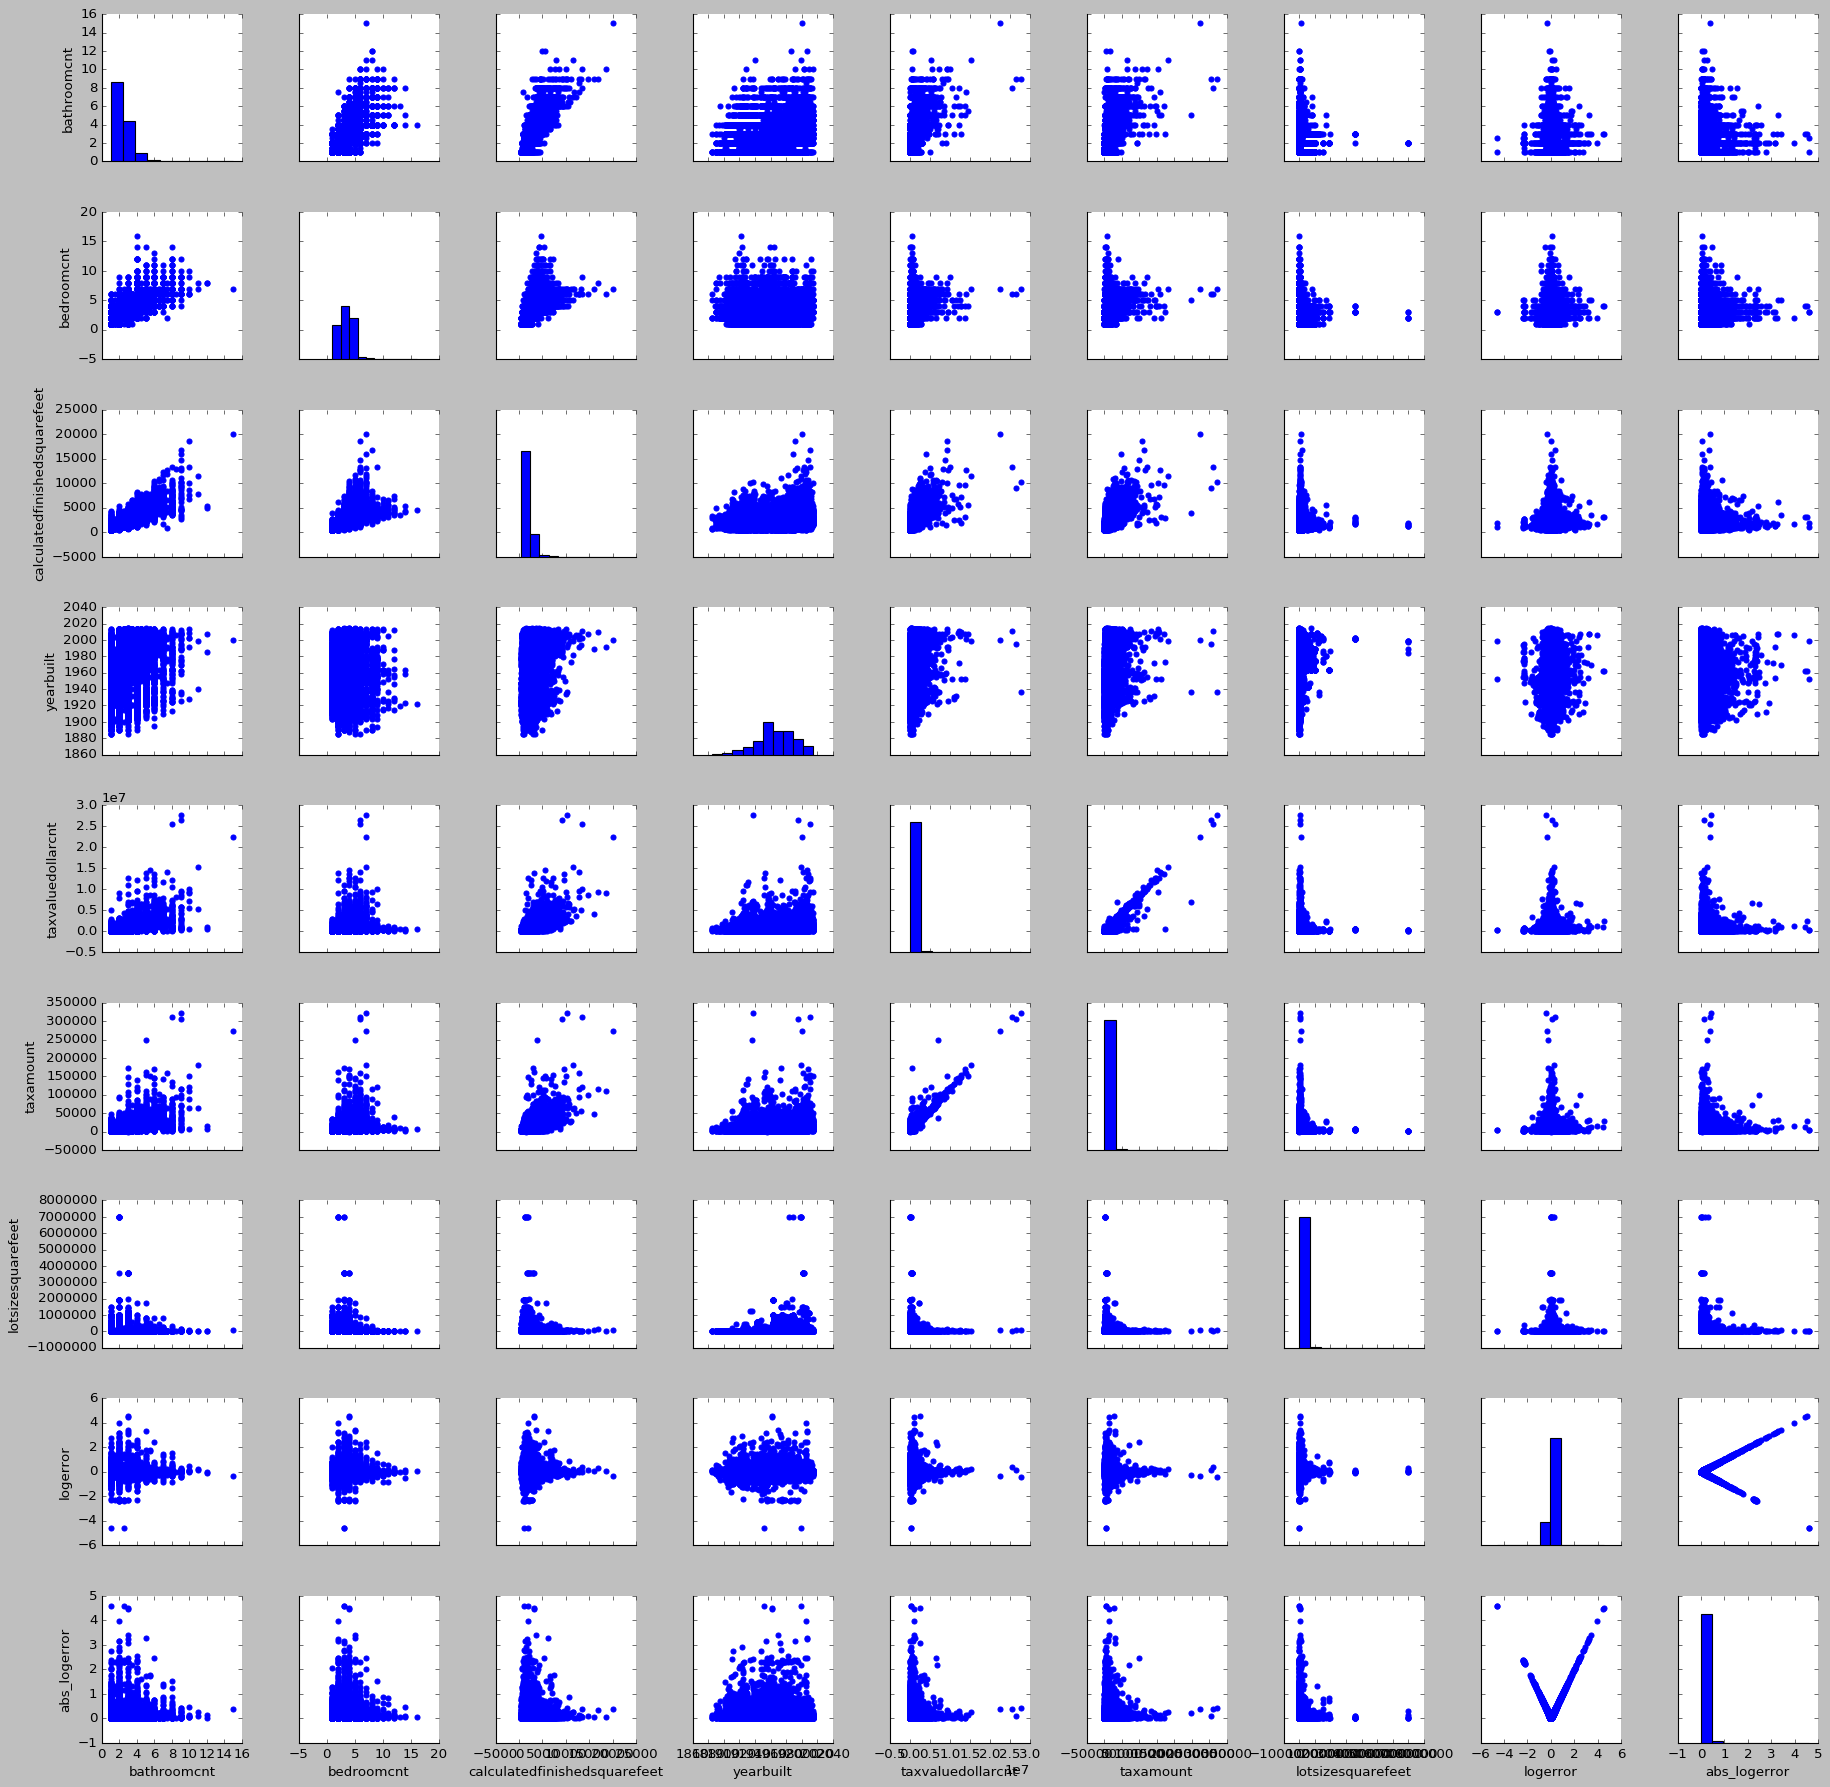

In [49]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

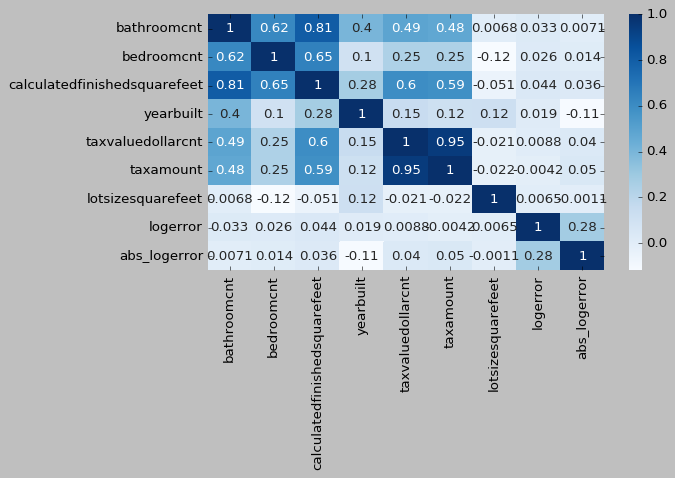

In [50]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.show()

In [53]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.abs_logerror) for col in column_names]

abs_corr_dict = dict(zip(column_names, r_and_p_values))
abs_corr_dict

{'bathroomcnt': (0.007053426438033801, 0.07797589514282269),
 'bedroomcnt': (0.01406961645870997, 0.0004382138765066674),
 'calculatedfinishedsquarefeet': (0.03553015855506935, 6.615149753467627e-19),
 'yearbuilt': (-0.11327633594758456, 2.1855806936961284e-177),
 'taxvaluedollarcnt': (0.040070257582042364, 1.2847215978182124e-23),
 'taxamount': (0.05004089565806902, 6.40208622826596e-36),
 'lotsizesquarefeet': (-0.0010779540139144858, 0.7876507933316118),
 'logerror': (0.28470561107384246, 0.0)}

In [54]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           abs_logerror   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     2761.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        01:32:56   Log-Likelihood:                 36153.
No. Observations:               62444   AIC:                        -7.229e+04
Df Residuals:                   62436   BIC:                        -7.222e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                     -0.0092      0.001     -9.488      0.000      -0.011      -0.007
bedroomcnt                       0.0014      0.001      2.016      0.044    3.91e-05       0.003
calculatedfinishedsquarefeet  6.268e-06   1.17e-06      5.350      0.000    3.97e-06    8.56e-06
yearbuilt                     3.279e-05   9.01e-07     36.386      0.000     3.1e-05    3.46e-05
taxvaluedollarcnt            -2.806e-08    3.1e-09     -9.064      0.000   -3.41e-08    -2.2e-08
taxamount                     3.268e-06   2.47e-07     13.242      0.000    2.78e-06    3.75e-06
lotsizesquarefeet             2.106e-09   4.62e-09      0.456      0.648   -6.95e-09    1.12e-08
logerror                         0.2581      0.003     74.649      0.000       0.251       0.265
==============================================================================
Omnibus:                   101908.725   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        129841583.970
Skew:                          10.666   Prob(JB):                         0.00
Kurtosis:                     225.371   Cond. No.                     4.72e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
lm1 = LinearRegression(fit_intercept=False)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [56]:
lm1.fit(X_train[['lotsizesquarefeet']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)
0.0
[[1.3289293e-07]]


In [57]:
print('Univariate - total_charges = b + m * tenure')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - total_charges = b + m * tenure
    y-intercept (b): 0.00
    coefficient (m): 0.00



In [58]:
y_pred_lm1 = lm1.predict(X_train[['lotsizesquarefeet']])
y_pred_lm1.shape

(62444, 1)

In [59]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

lm1
  mse: 0.0246


In [62]:
r2_lm1 = r2_score(y_train, y_pred_lm1)

print(''' {:.2%} of the variance in the abs_logerror can be explained by the lot size.'''.format(r2_lm1))

 -22.54% of the variance in the abs_logerror can be explained by the lot size.


Text(0.5, 1.0, 'Predicted vs Actual')

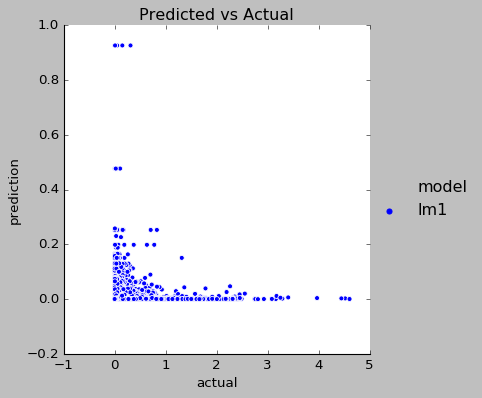

In [64]:
pd.DataFrame({'actual': y_train.abs_logerror,
              'lm1': y_pred_lm1.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot( c='black', ls=':')
plt.title('Predicted vs Actual')

Text(0, 0.5, 'Residuals')

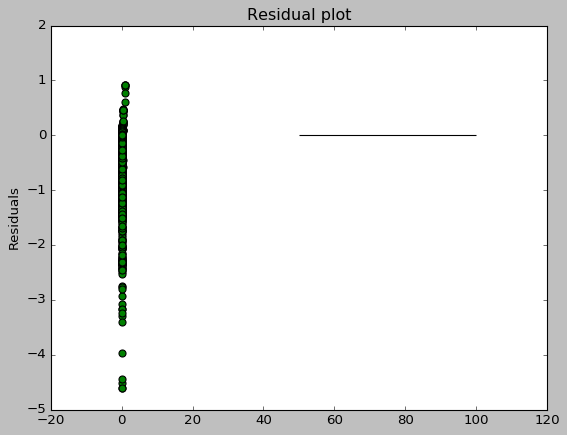

In [65]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_train, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [66]:
t1_lm1 = LinearRegression(fit_intercept=False)
print(t1_lm1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [67]:
t1_lm1.fit(X_test[['lotsizesquarefeet']], y_test)
print(t1_lm1)

t1_lm1_y_intercept = t1_lm1.intercept_
print(t1_lm1_y_intercept)

t1_lm1_coefficients = t1_lm1.coef_
print(t1_lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)
0.0
[[1.1500884e-07]]


In [68]:
print('Univariate - final_exam = b + m * tenure')
print('    y-intercept (b): %.2f' % t1_lm1_y_intercept)
print('    coefficient (m): %.2f' % t1_lm1_coefficients[0])
print()

Univariate - final_exam = b + m * tenure
    y-intercept (b): 0.00
    coefficient (m): 0.00



In [69]:
y_pred_t1_lm1 = t1_lm1.predict(X_test[['lotsizesquarefeet']])

In [70]:
mse_t1_lm1 = mean_squared_error(y_test, y_pred_t1_lm1)
print("t1_lm1\n  mse: {:.3}".format(mse_t1_lm1))

t1_lm1
  mse: 0.0282


In [71]:
r2_t1_lm1 = r2_score(y_test, y_pred_t1_lm1)

print('  {:.2%} of the variance in the abs_logerror can be explained by the lot size.'.format(r2_t1_lm1))

  -18.85% of the variance in the abs_logerror can be explained by the lot size.


In [72]:
mae_t1_lm1 = median_absolute_error(y_test, y_pred_t1_lm1)

In [73]:
mae_lm1 = median_absolute_error(y_train, y_pred_lm1)

In [74]:
mae_t1_lm1

0.031190486187614146

In [78]:
mae_lm1

0.03166997529648179

In [76]:
print(mse_lm1)
print(mse_t1_lm1)
print(r2_lm1)
print(r2_t1_lm1)
print(mae_lm1)
print(mae_t1_lm1)

0.024633935475150092
0.028202714170500905
-0.22540182277268572
-0.18852596631953622
0.03166997529648179
0.031190486187614146


In [80]:
f_regression(X_test[['lotsizesquarefeet']], y_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([2.80747288]), array([0.0938461]))

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Residuals')

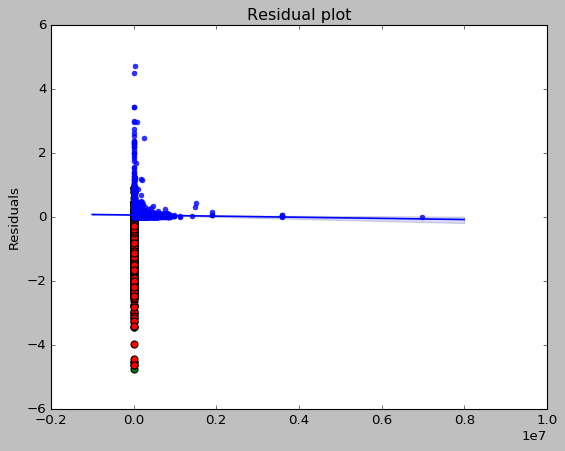

In [82]:
plt.scatter(y_pred_t1_lm1, y_pred_t1_lm1 - y_test, c='g', s=40)
plt.scatter(y_pred_lm1, y_pred_lm1 - y_train, c='r', s=40)
sns.regplot( X_test[['lotsizesquarefeet']], y_test.abs_logerror, data=test)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


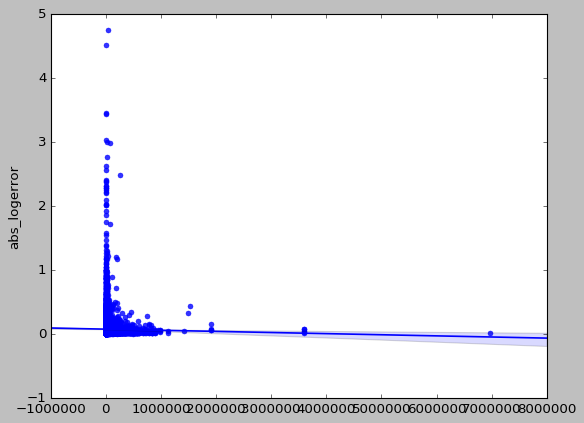

In [83]:
sns.regplot( X_test[['lotsizesquarefeet']], y_test.abs_logerror, data=test)
plt.show()

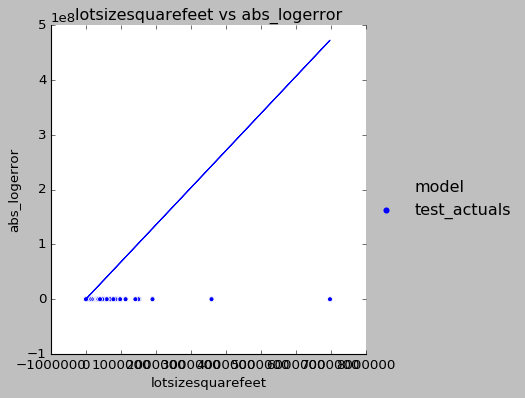

In [85]:
pd.DataFrame({'lotsizesquarefeet' : X_test.lotsizesquarefeet,
             'test_actuals' : y_test.abs_logerror})\
   .melt(id_vars=['lotsizesquarefeet'], var_name='model', value_name='abs_logerror')\
   .pipe((sns.relplot, 'data'), x='lotsizesquarefeet', y='abs_logerror', hue='model')
plt.plot
plt.title('lotsizesquarefeet vs abs_logerror')
x = X_test.lotsizesquarefeet
y = y_test.abs_logerror
m = 67.8155
b = 0
plt.plot(x, b + m * x, '-')
plt.show()

# Do more stuff